In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

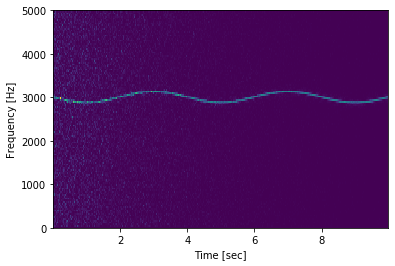

In [3]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


In [4]:
print(Sxx.shape)
print(x.shape)






(129, 446)
(100000,)


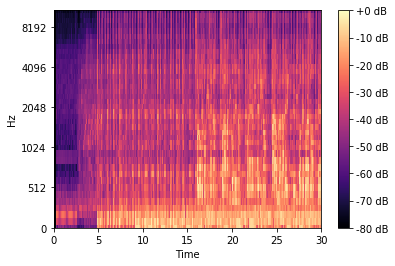

In [5]:
# Mel Spectogram
# https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0

import scipy
import librosa
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import librosa.display

y, sr = librosa.load('chunk0.wav')

n_fft = 1024
hop_length = 512 
n_mels = 40
window = scipy.signal.hanning

S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');


In [6]:
print(S.shape)



(40, 1292)


In [7]:
from pydub import AudioSegment
from pydub.utils import make_chunks
import scipy
import librosa
import csv
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import librosa.display

In [8]:
def chunking(song, sr):
    chunk_length_ms = 30 
    chunk_length = chunk_length_ms * sr
    total_chunks = song.shape[0]//chunk_length
    chunks = [song[chunk_length*i:chunk_length*(i+1)] for i in range(total_chunks)]
    return chunks

def specting(y, sr):
    n_fft = 1024
    hop_length = 512 
    n_mels = 40
    window = scipy.signal.hanning

    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
    return S

In [9]:
mel_spectograms = []
labels = []
ids = []

In [10]:
with open('MoodyLyrics4Q.csv') as rfile:
    csv_reader = csv.reader(rfile, delimiter=",")

    count = 0
    for row in csv_reader:
        if count > 1:   
            try:
                y, sr = librosa.load(path="/home/konpyro/Music/SongDataset/" + row[1] + ' ' + row[2] + '.mp3', mono=True)
                chunks = chunking(y, sr)
                for i, chunk in enumerate(chunks):
                    spectrogram = specting(chunk, sr)
                    mel_spectograms.append(spectrogram)
                    labels.append(row[3])
                    ids.append(row[0])
            except:
                print("Error loading: " + row[1] + ' ' + row[2])
        count += 1

/home/konpyro/PycharmProjects/VocalSeparation/venv/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/konpyro/PycharmProjects/VocalSeparation/venv/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/konpyro/PycharmProjects/VocalSeparation/venv/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/konpyro/PycharmProjects/VocalSeparation/venv/lib/python3.6/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
/home/konpyro/PycharmProjects/VocalSeparation/venv/lib/python3.6/site-packages/l

Error loading: Manic Street Preachers Ifwhiteamericatoldthetruthforonedayit'sworldwouldfallapart
Error loading: Emerson Hart If You're Gonna Leave
Error loading: The Tallest Man on Earth Love Is All
Error loading: The Proclaimers I'm On My Way
Error loading: The Streets Never Went to Church
Error loading: Egotrippi Matkustaja
Error loading: The Whitest Boy Alive Don't Give Up
Error loading: José Padilla Adios Ayer
Error loading: Girls In Hawaii Bees & butterflies
Error loading: ZZ Top Gimme All Your Lovin'
Error loading: Stacey Kent Bali Ha'i
Error loading: The World/Inferno Friendship Society Only Anarchists Are Pretty
Error loading: Tiger Lou Like my very own blood
Error loading: Nirvana Scentless Apprentice
Error loading: Björn Rosenström Mamma
Error loading: Queen Crazy Little Thing Called Love
Error loading: Reel 2 Real I Like to Move It
Error loading: Diana Krall You're My Thrill
Error loading: Kanye West We Don't Care
Error loading: The Replacements Can't Hardly Wait
Error loadi

In [11]:
print(len(mel_spectograms), len(labels))
print(mel_spectograms[0].shape)


12609 12609
(40, 1292)


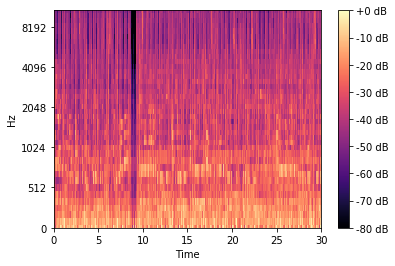

In [12]:
import librosa.display

hop_length = 512 
S = mel_spectograms[1000]
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, 
                         x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');


In [13]:
import hickle as hkl
hkl.dump(mel_spectograms, "spectograms.hkl")
hkl.dump(labels, "labels.hkl")
hkl.dump(ids, "ids.hkl")

In [14]:
# Load data from file
# data2 = hkl.load( 'new_data_file.hkl' )